In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# read the data
data = pd.read_csv('diamonds_data.csv')
data = data.drop(data.columns[0],axis=1)
data.head(3)

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,color,clarity,priceperpoint,carat_discrete
0,0.23,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,2,7,1,1
1,0.21,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,2,2,6,1,1
2,0.23,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,4,2,4,1,1


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 26 columns):
carat             53940 non-null float64
cut_Fair          53940 non-null int64
cut_Good          53940 non-null int64
cut_Ideal         53940 non-null int64
cut_Premium       53940 non-null int64
cut_Very Good     53940 non-null int64
color_D           53940 non-null int64
color_E           53940 non-null int64
color_F           53940 non-null int64
color_G           53940 non-null int64
color_H           53940 non-null int64
color_I           53940 non-null int64
color_J           53940 non-null int64
clarity_I1        53940 non-null int64
clarity_IF        53940 non-null int64
clarity_SI1       53940 non-null int64
clarity_SI2       53940 non-null int64
clarity_VS1       53940 non-null int64
clarity_VS2       53940 non-null int64
clarity_VVS1      53940 non-null int64
clarity_VVS2      53940 non-null int64
cut               53940 non-null int64
color             53940 non-nul

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,color,clarity,priceperpoint,carat_discrete
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,0.029848,0.090953,0.399537,0.255673,0.223990,0.125603,0.181628,0.176900,0.209344,...,0.170449,0.151483,0.227253,0.067760,0.093919,2.095903,3.594197,4.948980,2.370931,2.025695
std,0.474011,0.170169,0.287545,0.489808,0.436243,0.416919,0.331404,0.385541,0.381588,0.406844,...,0.376030,0.358522,0.419061,0.251337,0.291719,1.116600,1.701105,1.647136,0.886779,0.824844
min,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,1.000000
50%,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,5.000000,2.000000,2.000000
75%,1.040000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,6.000000,3.000000,3.000000
max,5.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,8.000000,4.000000,3.000000


In [4]:
# split
#cut data set into train and target data
from sklearn.model_selection import train_test_split
sampled_data=pd.concat([data[data['priceperpoint']==4].sample(7000),data[data['priceperpoint']==3].sample(7000),data[data['priceperpoint']==2].sample(7000),data[data['priceperpoint']==1].sample(7000)],ignore_index=True)

print(sampled_data['priceperpoint'].value_counts())
X=sampled_data.drop(['priceperpoint'], axis=1)
y=sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)
print("training \n",y_train.value_counts())
print("testing \n",y_test.value_counts())

4    7000
3    7000
2    7000
1    7000
Name: priceperpoint, dtype: int64
training 
 1    5968
2    5953
4    5947
3    5932
Name: priceperpoint, dtype: int64
testing 
 3    1068
4    1053
2    1047
1    1032
Name: priceperpoint, dtype: int64


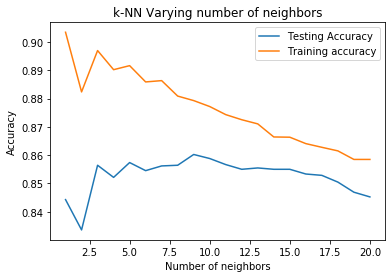

In [5]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_fit = knn.fit(X_train, y_train)

train_y_predicted = knn.predict(X_train)
test_y_predicted = knn.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(train_accuracy)
print(test_accuracy)

0.9034453781512605
0.8442857142857143


In [7]:
#數值化cut, color, clarity+離散化carat
X = sampled_data[['carat_discrete','cut','color','clarity']]
y = sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)

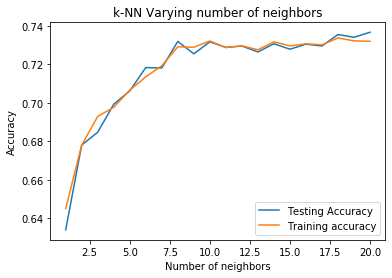

In [8]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn1 = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn1.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn1.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn1.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
knn1 = neighbors.KNeighborsClassifier(n_neighbors=20)
knn1_fit = knn1.fit(X_train, y_train)

# 預測
train_y_predicted = knn1.predict(X_train)
test_y_predicted = knn1.predict(X_test)
# 績效
train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(train_accuracy)
print(test_accuracy)

0.7319747899159664
0.7366666666666667


In [10]:
#離散carat+二值化cut,color,clarity
X = sampled_data.drop(['cut','color','clarity','carat','priceperpoint'], axis=1)
y = sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)

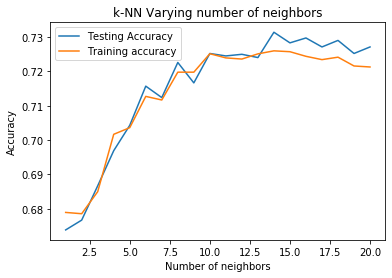

In [11]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn2 = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn2.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn2.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn2.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
knn2 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn2_fit = knn2.fit(X_train, y_train)

train_y_predicted = knn2.predict(X_train)
test_y_predicted = knn2.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(train_accuracy)
print(test_accuracy)

0.7257563025210084
0.7283333333333334


In [13]:
#連續carat+二值化3c
X = sampled_data.drop(['cut','color','clarity','carat_discrete','priceperpoint'], axis=1)
y = sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)

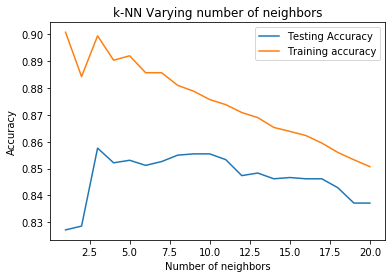

In [14]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn3 = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn3.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn3.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn3.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3_fit = knn3.fit(X_train, y_train)

# 預測
train_y_predicted = knn3.predict(X_train)
test_y_predicted = knn3.predict(X_test)
# 績效
train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(train_accuracy)
print(test_accuracy)

0.899453781512605
0.8576190476190476


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn3.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,All
True,,,,,
1,934,97,0,1,1032
2,119,834,93,1,1047
3,1,91,850,126,1068
4,2,2,65,984,1053
All,1056,1024,1008,1112,4200


Confusion matrix, without normalization
[[934  97   0   1]
 [119 834  93   1]
 [  1  91 850 126]
 [  2   2  65 984]]
Normalized confusion matrix
[[0.90503876 0.09399225 0.         0.00096899]
 [0.11365807 0.7965616  0.08882521 0.00095511]
 [0.00093633 0.08520599 0.79588015 0.11797753]
 [0.00189934 0.00189934 0.0617284  0.93447293]]


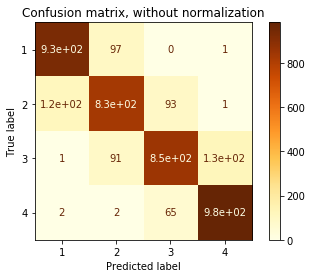

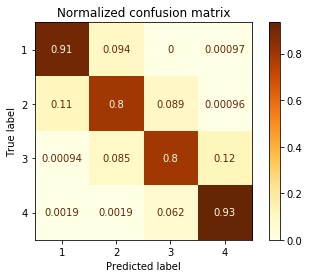

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn3, X_test, y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89      1032
           2       0.81      0.80      0.81      1047
           3       0.84      0.80      0.82      1068
           4       0.88      0.93      0.91      1053

    accuracy                           0.86      4200
   macro avg       0.86      0.86      0.86      4200
weighted avg       0.86      0.86      0.86      4200



In [20]:
#連續carat+數值化3c
X = sampled_data[['carat','cut','color','clarity']]
y = sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)

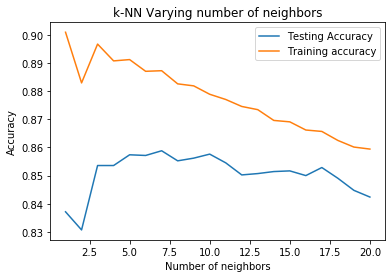

In [21]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn4 = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn4.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn4.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn4.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
knn4 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn4_fit = knn4.fit(X_train, y_train)

# 預測
train_y_predicted = knn4.predict(X_train)
test_y_predicted = knn4.predict(X_test)
# 績效
train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(train_accuracy)
print(test_accuracy)

0.8966806722689076
0.8535714285714285


In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn4.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,All
True,,,,,
1,915,116,0,1,1032
2,115,831,100,1,1047
3,1,82,863,122,1068
4,1,2,74,976,1053
All,1032,1031,1037,1100,4200


Confusion matrix, without normalization
[[915 116   0   1]
 [115 831 100   1]
 [  1  82 863 122]
 [  1   2  74 976]]
Normalized confusion matrix
[[0.88662791 0.1124031  0.         0.00096899]
 [0.10983763 0.79369628 0.09551098 0.00095511]
 [0.00093633 0.07677903 0.80805243 0.11423221]
 [0.00094967 0.00189934 0.0702754  0.92687559]]


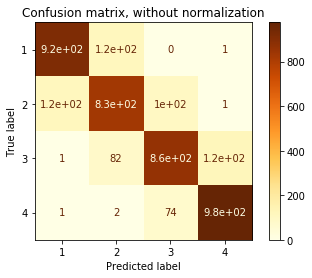

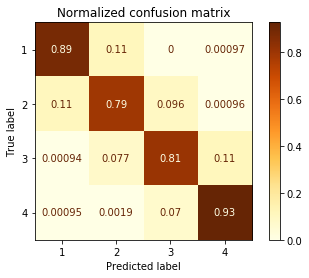

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn4, X_test, y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89      1032
           2       0.81      0.79      0.80      1047
           3       0.83      0.81      0.82      1068
           4       0.89      0.93      0.91      1053

    accuracy                           0.85      4200
   macro avg       0.85      0.85      0.85      4200
weighted avg       0.85      0.85      0.85      4200

